In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

In [3]:
plunges = np.load('plunges.npy', allow_pickle = True)[()]

/Users/rsimons/opt/miniconda3/envs/py35/lib/python3.5/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/rsimons/opt/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:109: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


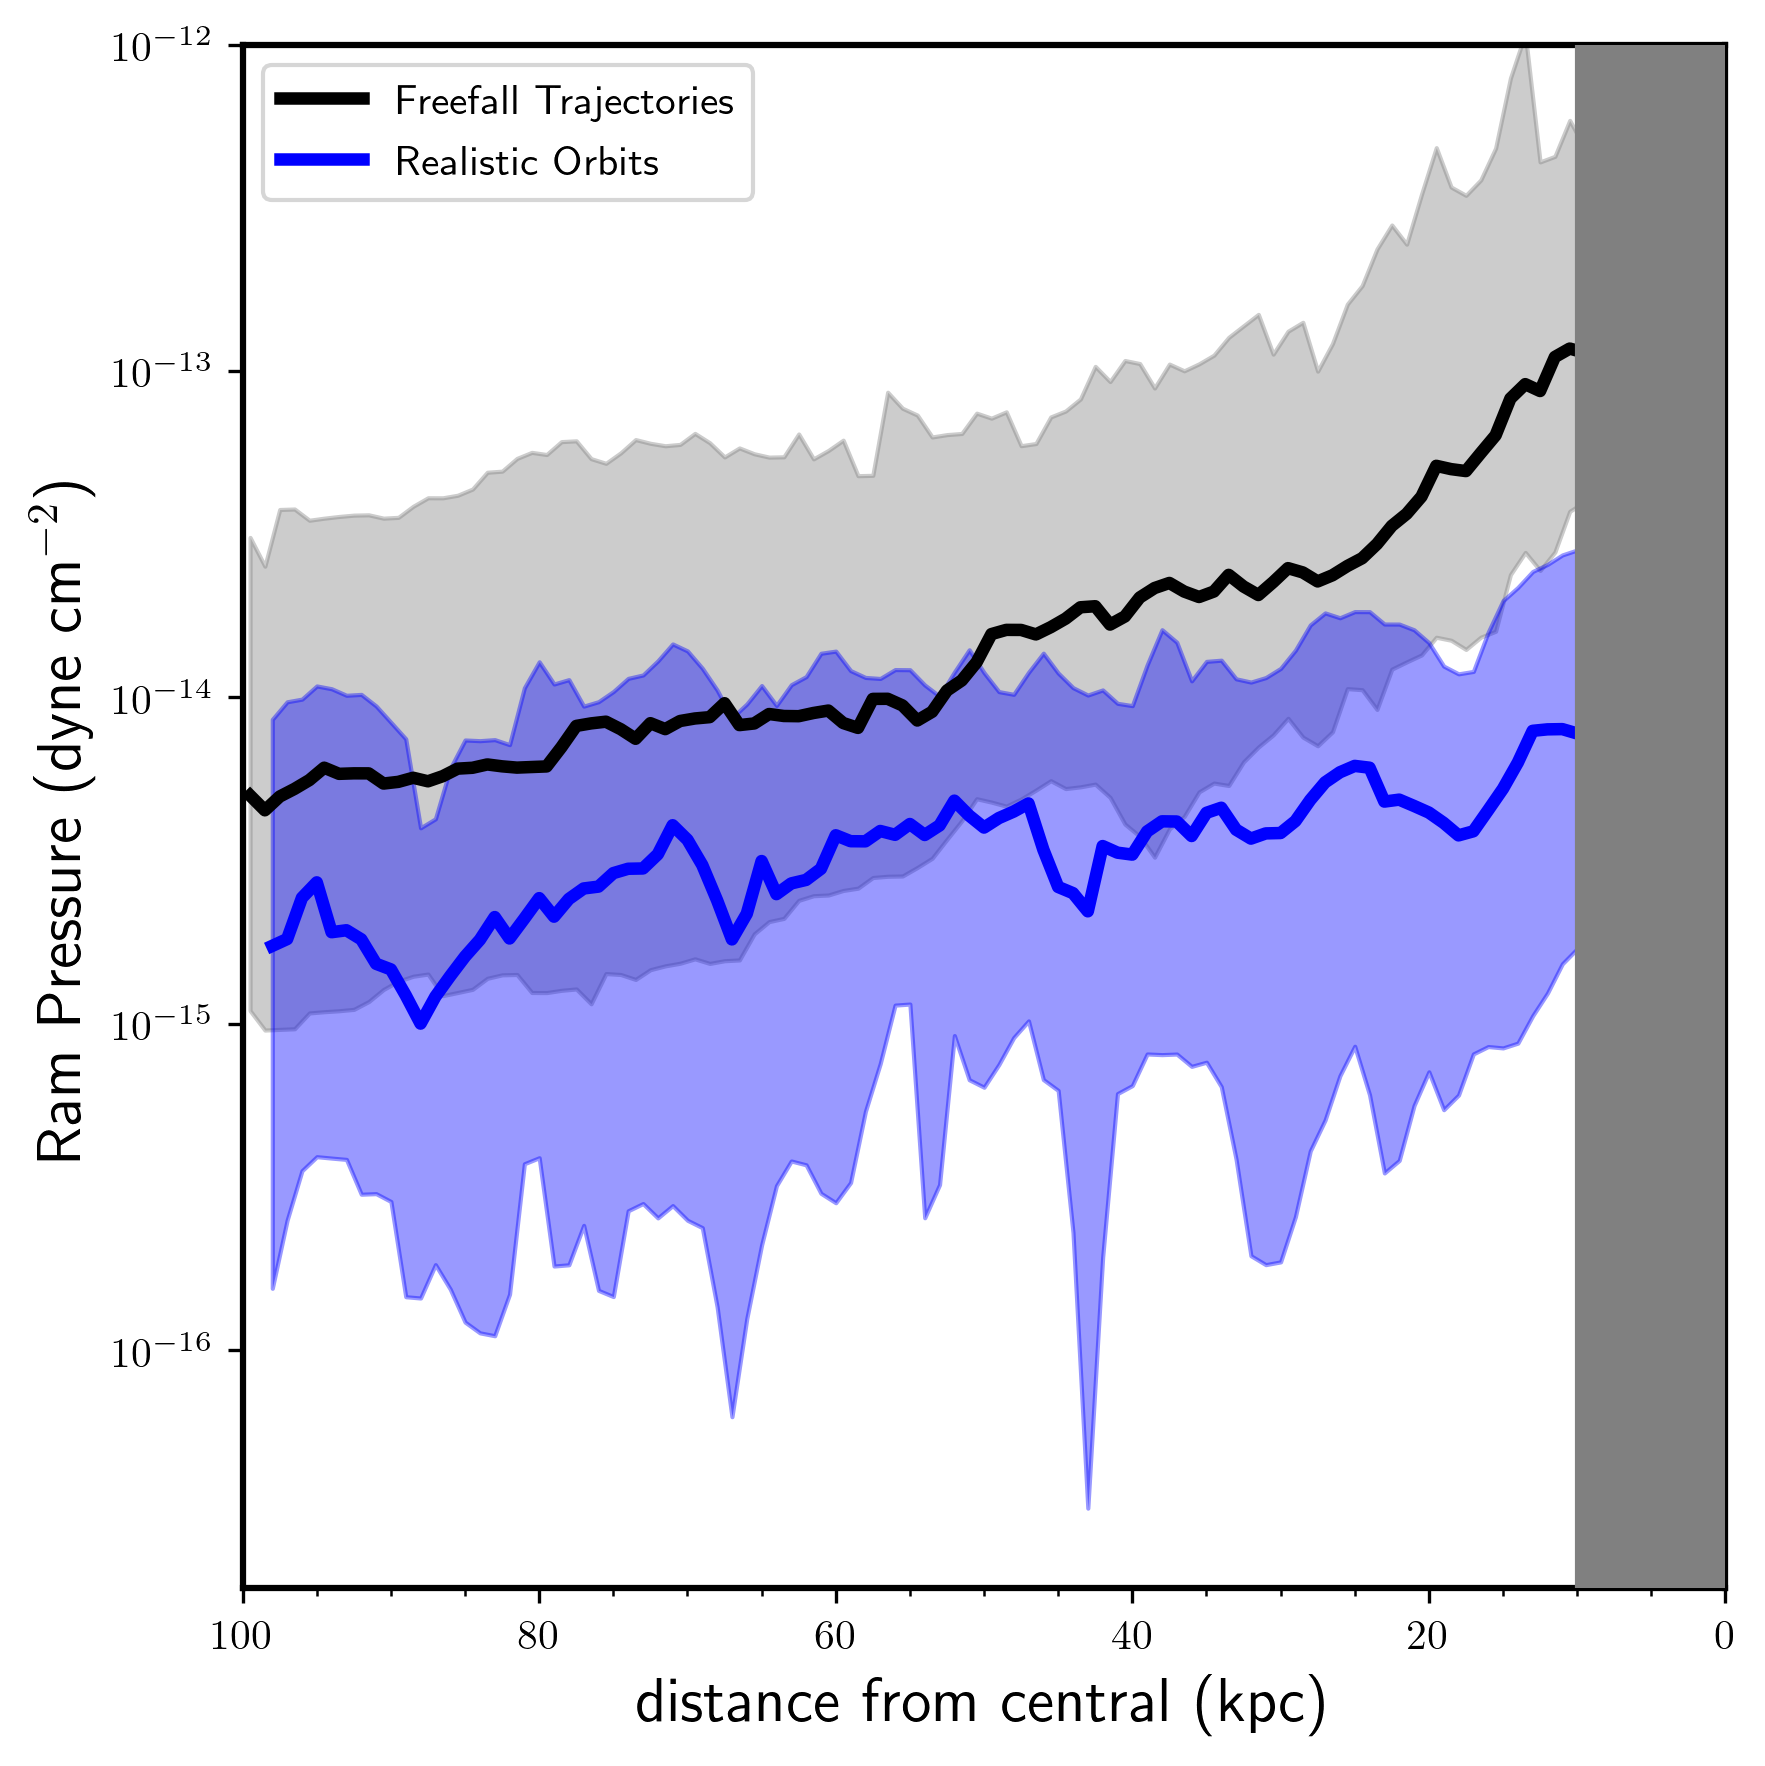

In [51]:
fig, ax = plt.subplots(1,1, figsize = (6, 6))

distance_all = []
R_all = []


clr = 'black'
haloname = 'halo_008508'
flname = '%s_simulated_plunge.npy'%(haloname)
plunge_sim = np.load('/Users/rsimons/Dropbox/foggie/outputs/plunge_tunnels/%s'%flname, allow_pickle = True)[()]

ts_all = array([])
P_all = array([])
m_all  = array([])
dmids_all  = array([])

simname = 'nref11c_nref9f'
nrays = 100.
for i in arange(nrays):
    ray_name = 'ray_%s'%int(i)
    dmids   = plunge_sim[simname][ray_name]['dmids']
    P     = plunge_sim[simname][ray_name]['P']
    dmids_all = concatenate((dmids_all, dmids))
    P_all  = concatenate((P_all, P))

smoothed_d = []
smoothed_d_all = arange(0, 100, 1.)

smoothed_P_5 = []
smoothed_P_16 = []
smoothed_P_50 = []
smoothed_P_84 = []
smoothed_P_95 = []


for d in smoothed_d_all:

    gd = where((dmids_all > d) & (dmids_all < d+1) & (P_all > 0.))[0]
    if len(gd) > 5:
        perc_P = np.percentile(log10(P_all[gd]), [5, 16, 50, 84, 95])

        smoothed_P_5.append( perc_P[0])
        smoothed_P_16.append( perc_P[1])
        smoothed_P_50.append(perc_P[2])
        smoothed_P_84.append( perc_P[3])
        smoothed_P_95.append( perc_P[4])
        smoothed_d.append(d)

smoothed_d      = np.array(smoothed_d)
smoothed_P_5    = np.array(smoothed_P_5 )
smoothed_P_16   = np.array(smoothed_P_16)
smoothed_P_50   = np.array(smoothed_P_50)
smoothed_P_84   = np.array(smoothed_P_84)
smoothed_P_95   = np.array(smoothed_P_95)

#ax.plot(smoothed_d + 0.5, 10**(smoothed_P_16), color = 'black', linewidth = 1.5)
ax.plot(smoothed_d + 0.5, 10**(smoothed_P_50), color = 'black', linewidth = 3, label = 'Freefall Trajectories')
#ax.plot(smoothed_d + 0.5, 10**(smoothed_P_84), color = 'black', linewidth = 1.5)
ax.fill_between(smoothed_d + 0.5, y1 = 10**(smoothed_P_16), y2 = 10**(smoothed_P_84), color = 'grey', alpha = 0.4)



for h, halo in enumerate(plunges):
    for sat in plunges[halo]:
        for i in plunges[halo][sat]:
            distance = np.array(plunges[halo][sat][i]['r'])
            RP = (plunges[halo][sat][i]['RP'] * u.g*u.km**2/(u.cm**3*u.s**2)).to('dyne/cm^2')
            gd = where(RP > 0)[0]

            #ax.plot(distance[gd], RP[gd], 'k.', alpha = 0.1, markersize = 3)
            for g in gd:
                distance_all.append(distance[g])
                R_all.append(RP[g].value)
                
R_all = np.array(R_all)
#t_all = np.array(t_all)

p16_all = []
p50_all = []
p84_all = []
rmid_all = []
db = 2.
for rmin in np.arange(7, 100 - db, 1):
    rmax = rmin+db
    rmid = (rmax + rmin)/2.
    gd = where((distance_all < rmax) & (distance_all > rmin))[0]
    p16, p50, p84 = np.percentile(R_all[gd], [16, 50, 84])
    rmid_all.append(rmid)
    p16_all.append(p16)
    p50_all.append(p50)
    p84_all.append(p84)

ax.plot(rmid_all, p50_all, 'b-', linewidth = 3, label = 'Realistic Orbits')
ax.fill_between(rmid_all, y1 = p16_all, y2 = p84_all, color = 'blue', alpha = 0.4)
ax.legend(loc = 2)
ax.axvspan(10, 0, color = 'grey', zorder = 10)
                
ax.set_yscale('log')
ax.set_ylim(-1.e-17, 1.e-12)

ax.set_yscale('symlog', linthreshy=1.e-16)
ax.set_xlim(100,0.)
ax.set_xlabel('distance from central (kpc)')
ax.set_ylabel('Ram Pressure (dyne cm$^{-2}$)')
ax.minorticks_on()
fig.tight_layout()
fig.set_dpi(300)
fig.savefig('RP_distance.png')

In [34]:
dmids_all

array([99.92996831, 99.78988095, 99.64974563, ...,  9.67490381,
        9.46699586,  9.25844393])

2878 f
2878 h
2878 q
2878 l
5036 c
5036 g
5036 d


/Users/rsimons/opt/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less
No handles with labels found to put in legend.


4123 b
4123 a
6.61218787942186 7.033855353717317 7.5407390753722705


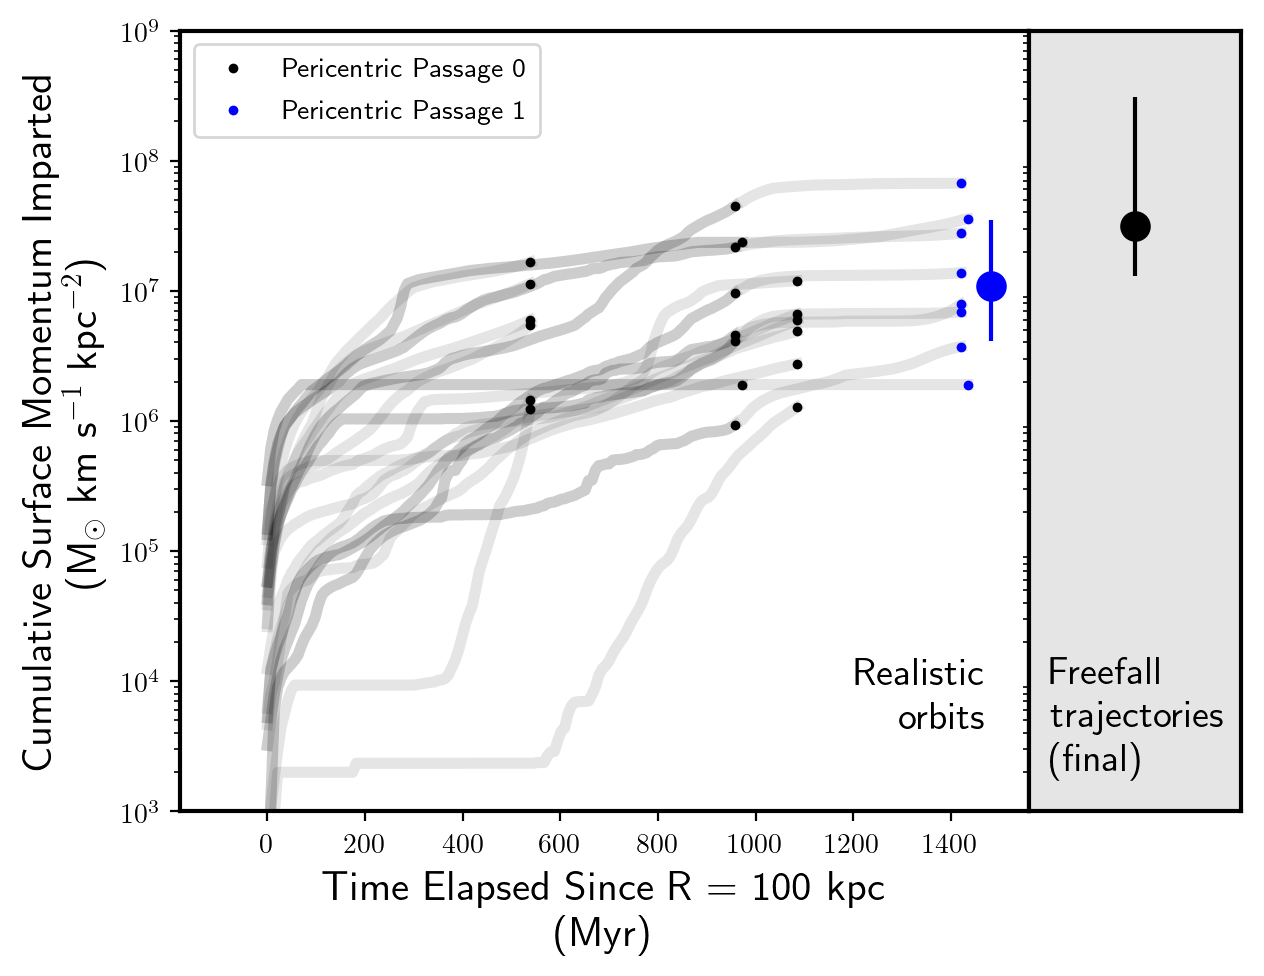

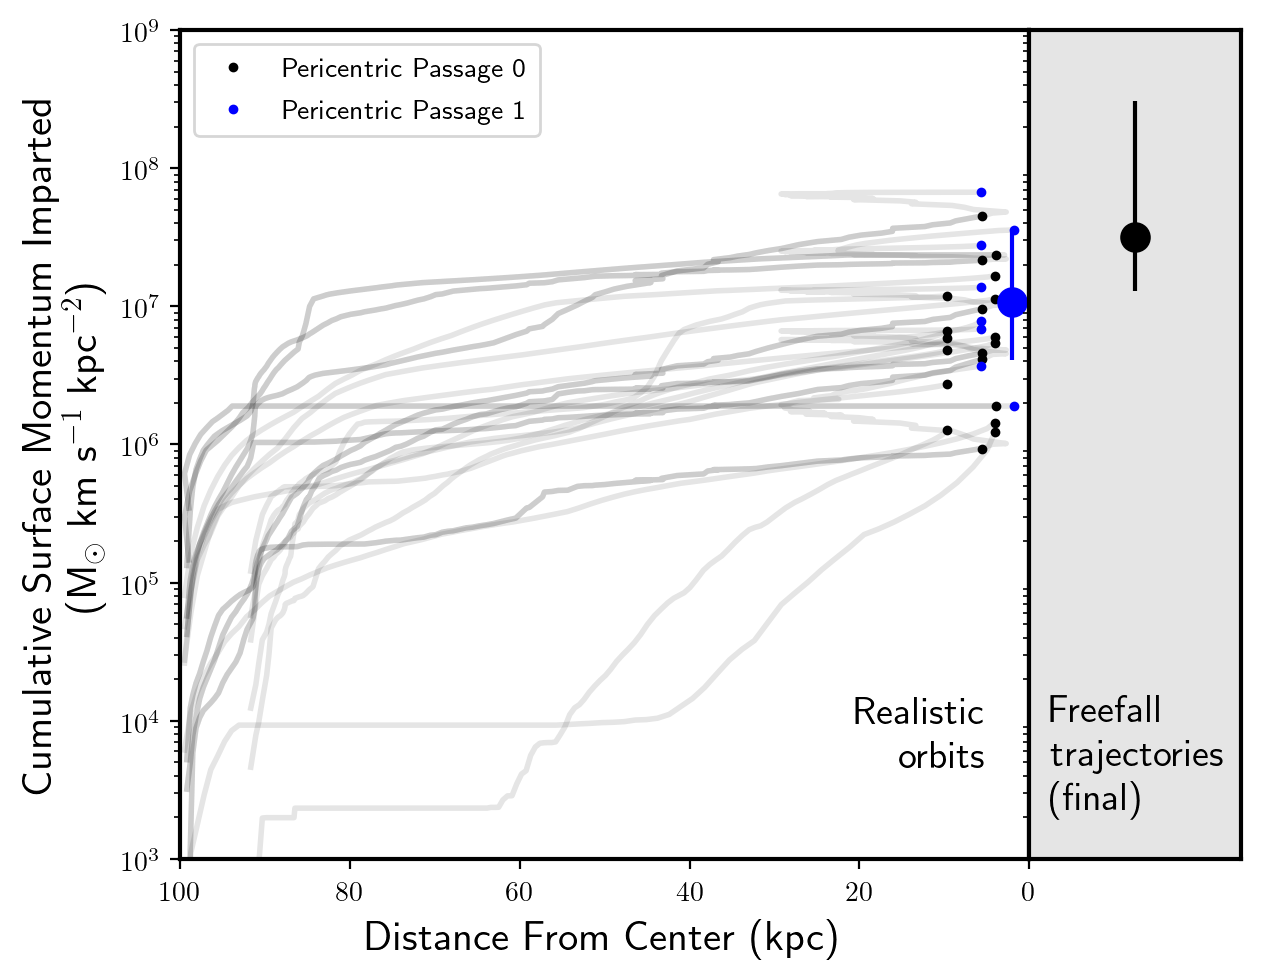

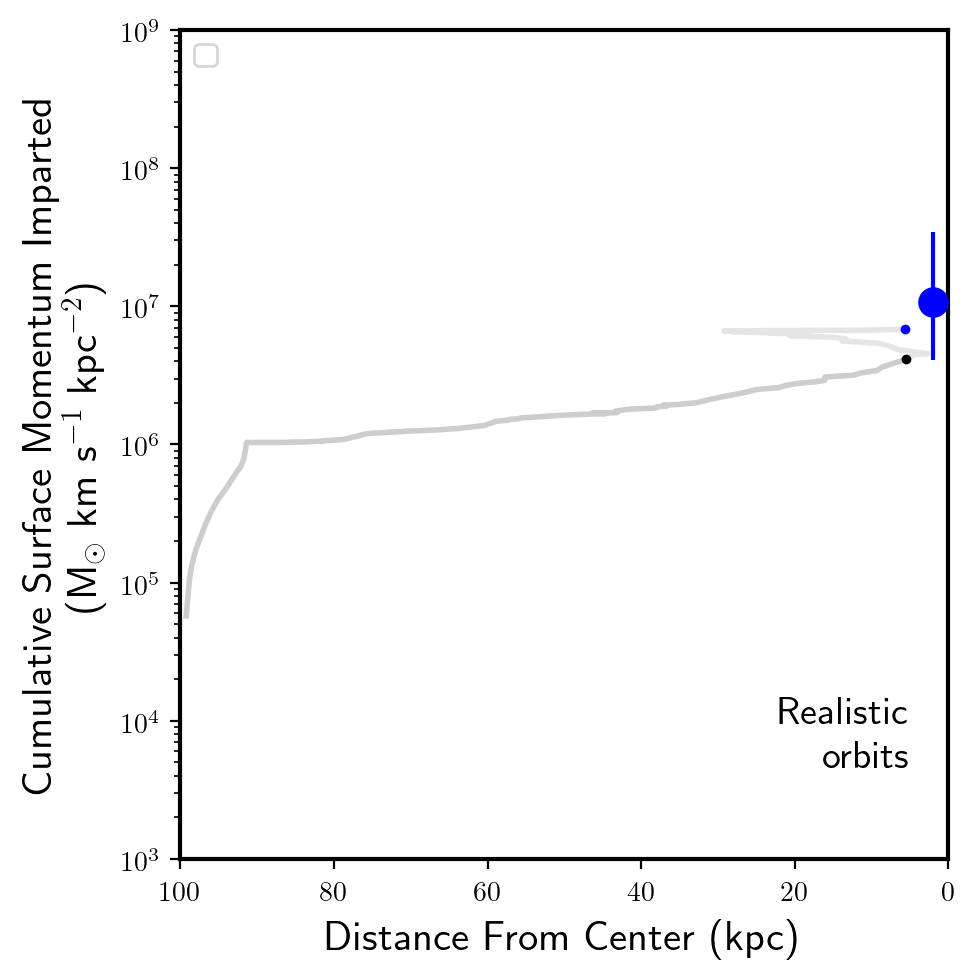

In [4]:
sample = [('2878', 'f'),
          ('2878', 'h'),
          ('2878', 'q'),
          ('2878', 'l'),
          ('5036', 'c'),
          ('5036', 'g'),
          ('5036', 'd'), 
          ('4123', 'b'),
          ('4123', 'a')]

#sample = [('2878', 'h'), ('4123', 'a')]

fig1 = plt.figure(figsize = (6.5, 5))
ax1 = plt.subplot2grid((1, 5), (0, 0), colspan=4)
ax1_sub = plt.subplot2grid((1, 5), (0, 4), colspan=1)


fig2 = plt.figure(figsize = (6.5, 5))
ax2 = plt.subplot2grid((1, 5), (0, 0), colspan=4)
ax2_sub = plt.subplot2grid((1, 5), (0, 4), colspan=1)


#fig1, ax1 = plt.subplots(1,1, figsize = (5, 5))
#fig2, ax2 = plt.subplots(1,1, figsize = (5, 5))
fig3, ax3 = plt.subplots(1,1, figsize = (5, 5))

sat_orbits = np.load('satellite_orbits.npy', allow_pickle = True)[()]

m_peri_all = []

clrs = ['black', 'blue', 'green', 'red']
for c in np.arange(len(clrs))[:2]:
    ax1.plot(-99,-99, '.', color = clrs[c], alpha =1., markersize = 5, label = r'Pericentric Passage %i'%c)
    ax2.plot(-99,-99, '.', color = clrs[c], alpha =1., markersize = 5, label = r'Pericentric Passage %i'%c)

for s, (halo, sat) in enumerate(sample):
    print (halo, sat)
    n_peri = len(sat_orbits[halo][sat]['peri_index'])
    peri_index_1 = sat_orbits[halo][sat]['peri_index'][-1]
    for i in plunges[halo][sat]:
        distance    = np.array(plunges[halo][sat][i]['r'])
        time = np.array(plunges[halo][sat][i]['t'])*1.4
        
        g_min = where(distance < 100.)[0][0]
        for p, peri_index in enumerate(sat_orbits[halo][sat]['peri_index'][:2]):

            g_max = peri_index
            if distance[g_max] > 15: continue
            RP = (plunges[halo][sat][i]['RP'] * u.g*u.km**2/(u.cm**3*u.s**2)).to('dyne/cm^2')

            arg = argsort(time[g_min:g_max])
            
            RP[np.isnan(RP)] = 0.
            cmsum = cumsum(RP[g_min:g_max][arg] * 5.4*u.Myr).to('Msun*km/s/kpc^2')
            t_norm = time[g_min:g_max] - time[g_min]

            ax1.plot(t_norm, cmsum, 'k-', alpha = 0.1, linewidth = 4)
            ax1.plot(t_norm[-1], cmsum[-1], '.', color = clrs[p], alpha =1., markersize = 5)
            if p == 1: 
                m_peri_all.append(cmsum[-1].value)
                
            ax2.plot(distance[g_min:g_max], cmsum, 'k-', alpha = 0.1, linewidth = 2)
            ax2.plot(distance[g_min:g_max][-1], cmsum[-1], '.', color = clrs[p], alpha =1., markersize = 5)
            
            if (halo == '4123') & (sat == 'a') & (i == 1):
                ax3.plot(distance[g_min:g_max], cmsum, 'k-', alpha = 0.1, linewidth = 2)
                ax3.plot(distance[g_min:g_max][-1], cmsum[-1], '.', color = clrs[p], alpha =1., markersize = 5)

           

#ax1.axvline(x = 600, linestyle = 'dashed', color = 'black')
#ax1.annotate("freefall", 600, 1.e3, rotation = 90, x = 600, linestyle = 'dashed', color = 'black')

ax1.legend(loc = 2)
ax2.legend(loc = 2)
ax3.legend(loc = 2)
        
m_peri_all = np.array(m_peri_all)
m_peri_all = m_peri_all[~np.isnan(m_peri_all)]
m_peri_all = m_peri_all[m_peri_all > 0.]
p16, p50, p84 = np.percentile(m_peri_all, [16, 50, 84])
print (np.log10(p16), np.log10(p50), np.log10(p84))

for ax in [ax1, ax2, ax3]:
    ax.set_yscale('log')
    ax.set_ylim(1.e3, 1.e9)
    ax.set_ylabel('Cumulative Surface Momentum Imparted\n(M$_{\odot}$ km s$^{-1}$ kpc$^{-2}$)')
    ax.annotate('Realistic\norbits', (0.95, 0.2), \
            xycoords = 'axes fraction', color = 'black',
            ha = 'right', va = 'top', fontsize = 14)

    
ax1.set_xlabel('Time Elapsed Since R = 100 kpc\n(Myr)')
ax2.set_xlabel('Distance From Center (kpc)')
ax2.set_xlim(100,0)
ax3.set_xlabel('Distance From Center (kpc)')
ax3.set_xlim(100,0)

for ax in [ax1, ax2, ax3]:
    if ax.get_xlim()[1] == 0: x = 2
    else: x = ax.get_xlim()[1]*0.98
        
    ax.errorbar(x, p50, yerr = [[p50-p16], [p84 - p50]], \
                 fmt = 'o', color = 'blue', zorder = 10, markersize = 10)


for ax in [ax1_sub, ax2_sub]:
    ax.set_yscale('log')
    ax.set_ylim(1.e3, 1.e9)
    ax.set_yticks([])
    ax.set_xticks([])
 
    #6.80,  7.11,  7.50,  8.49,  9.23
    ax.errorbar(0.5, 10**7.50, yerr = [[10**7.50-10.**7.11], [10**8.49-10**7.50]], \
                 fmt = 'o', color = 'black', zorder = 10, markersize = 10)
    ax.set_xlim(0,1)
    
    ax.annotate('Freefall\ntrajectories\n(final)', (0.1, 0.2), \
            xycoords = 'axes fraction', color = 'black',
            ha = 'left', va = 'top', fontsize = 14)

    ax.axvspan(xmin = 0.00, xmax = 1.0, color = 'grey', alpha = 0.2)
for fig in [fig1, fig2, fig3]:
    fig.tight_layout()
    fig.subplots_adjust(wspace = 0.0)
    fig.set_dpi(200)



fig1.savefig('cumsum_time.png')
fig2.savefig('cumsum_distance.png')
fig3.savefig('cumsum_distance_single.png')



In [95]:
m_peri_all

array([ 2652907.05147493,  5533511.04582296,  5334060.14252086,
        3362307.58963378,  2793430.05694003, 10572377.54182123,
       35697758.1735603 ,  1897806.20207164,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
        7859787.51309133,  6868719.49483144,  3716058.10994688,
       13761689.05642922, 66998139.23513789, 27655960.0822349 ])

0.2


/Users/rsimons/opt/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
/Users/rsimons/opt/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/rsimons/opt/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
/Users/rsimons/opt/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


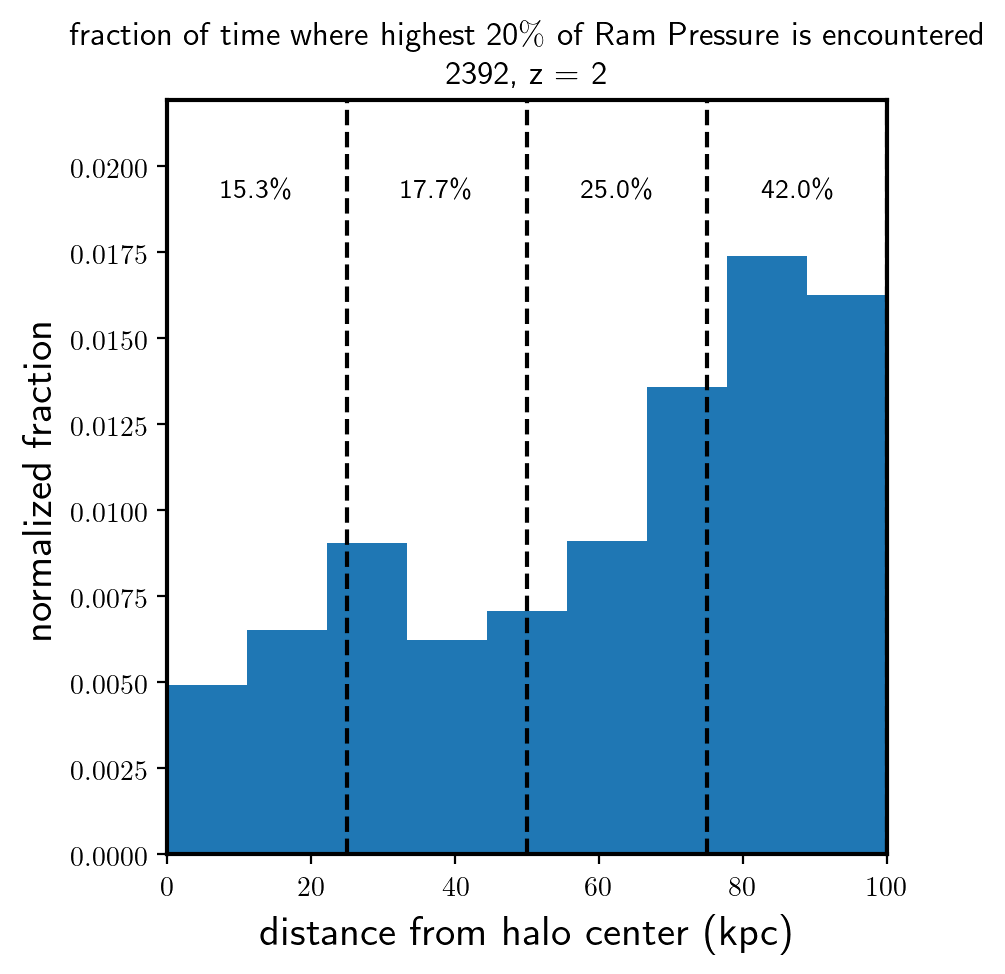

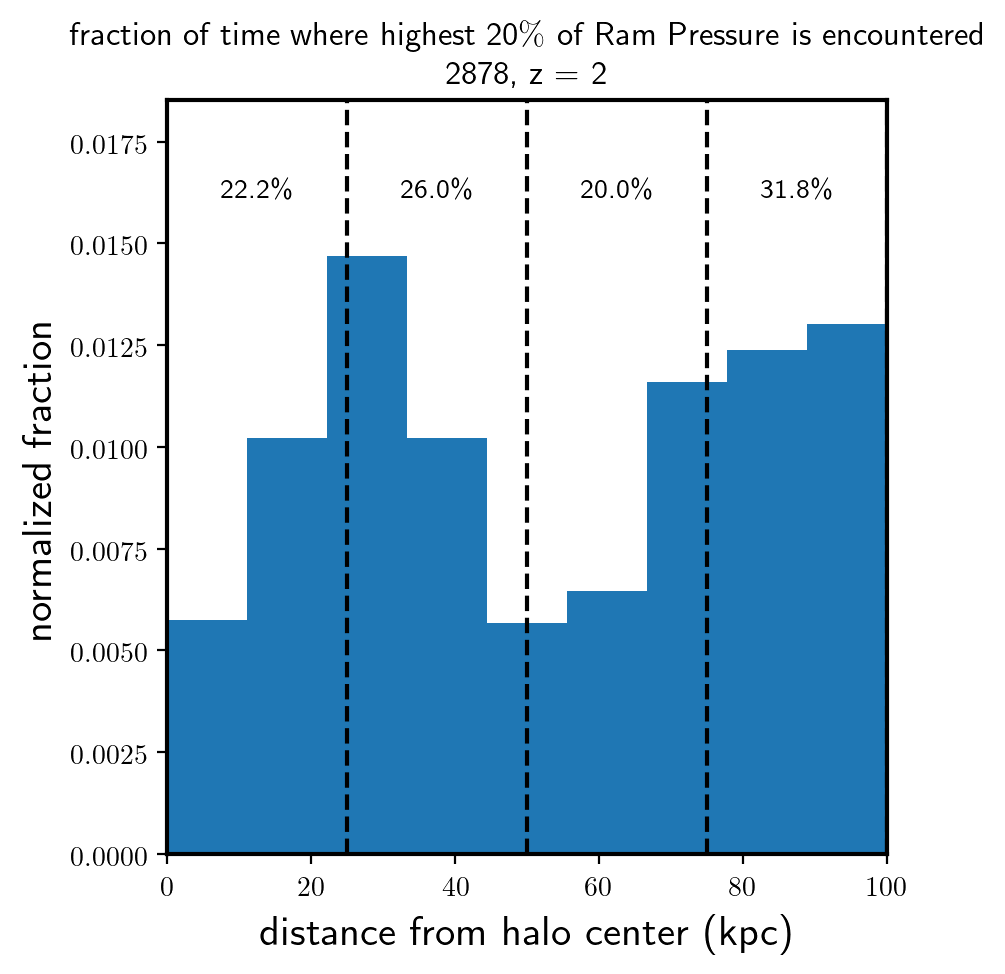

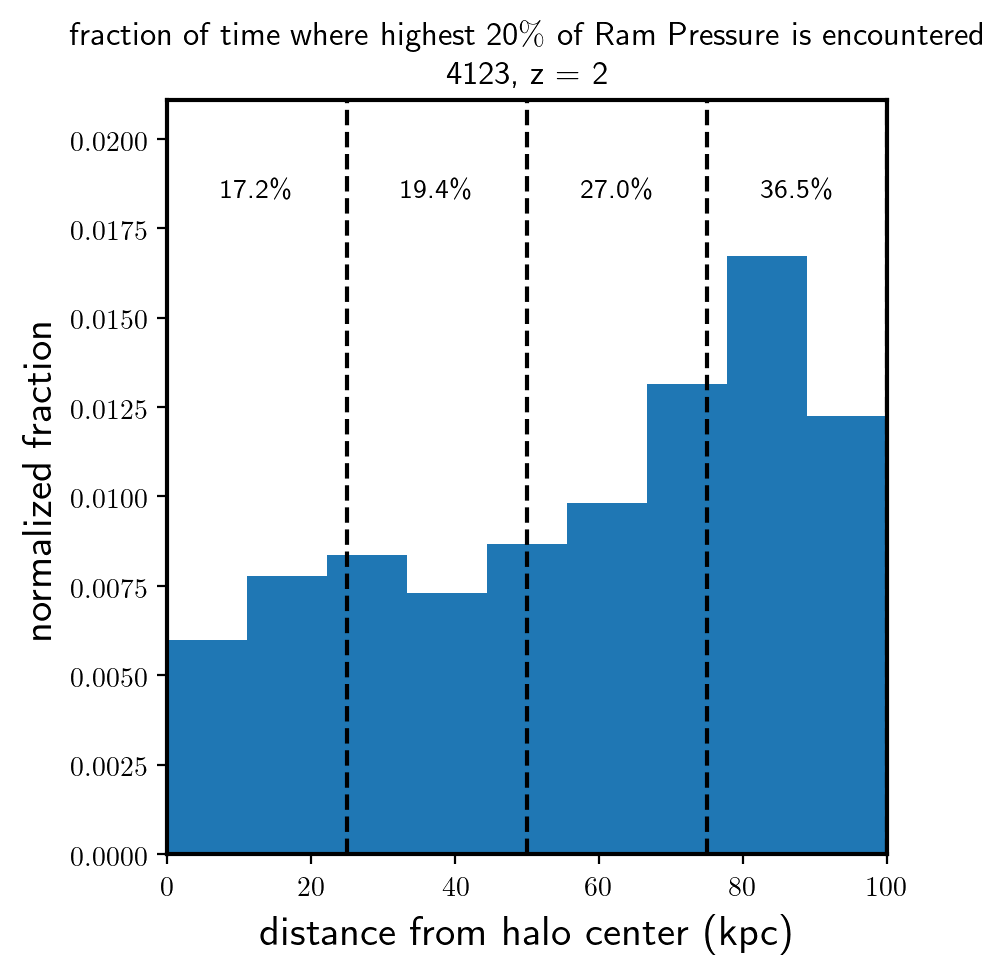

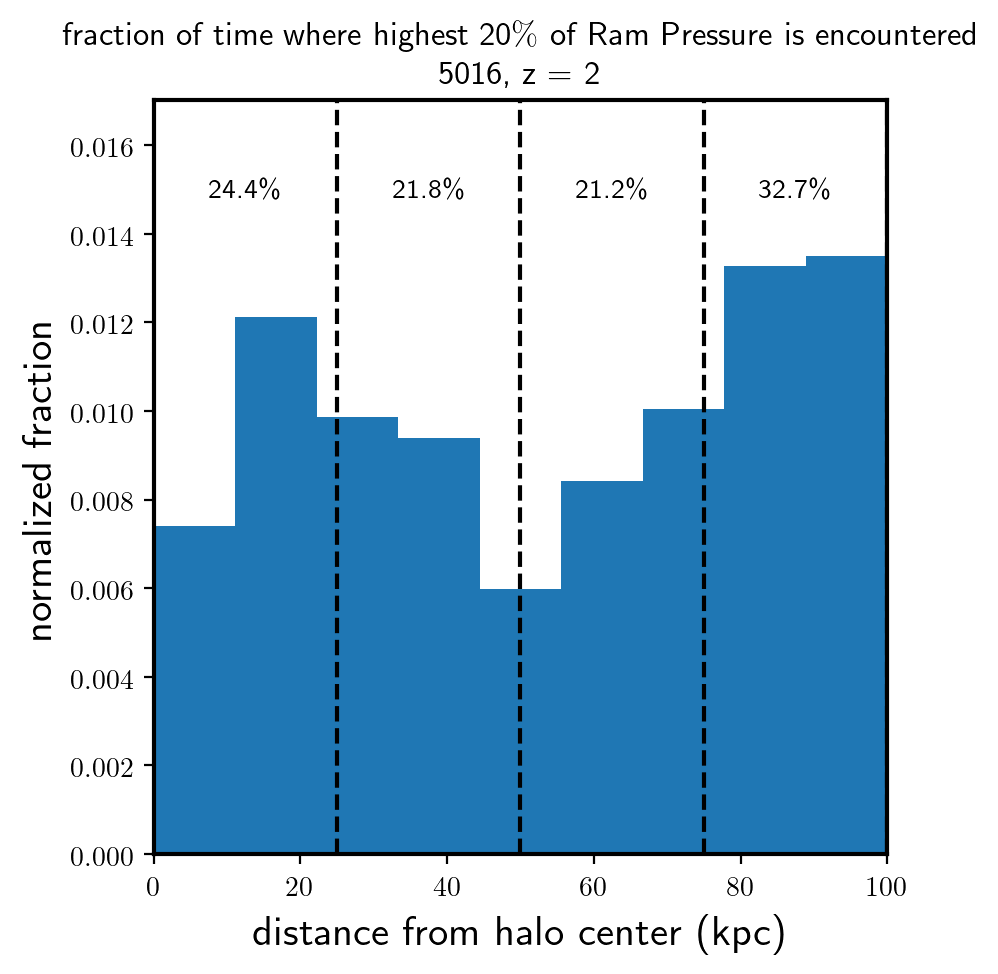

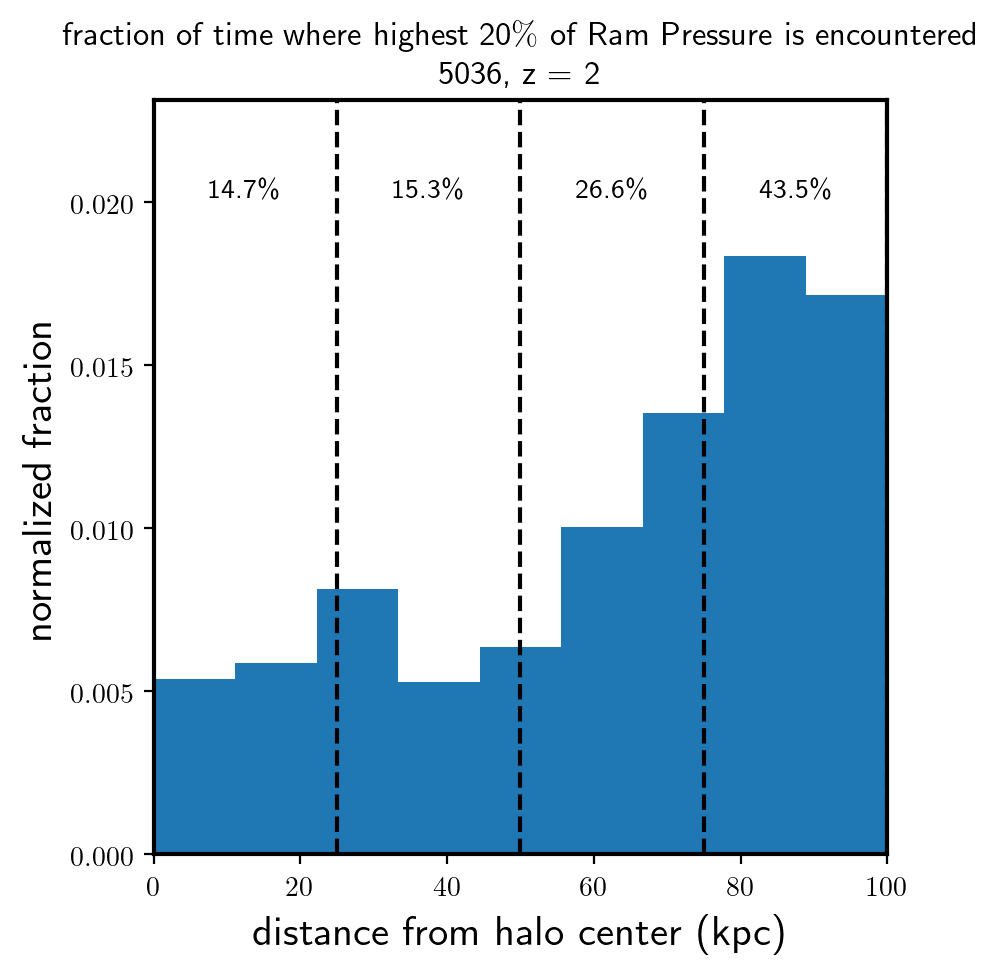

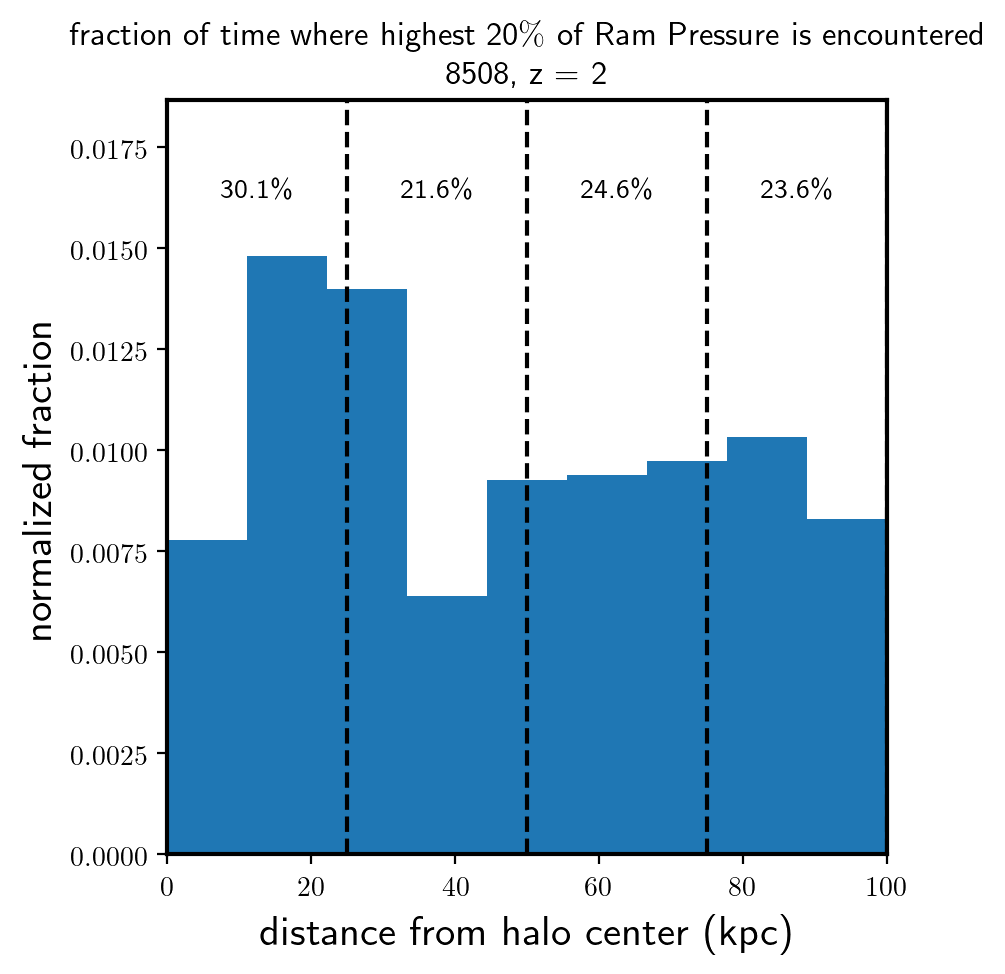

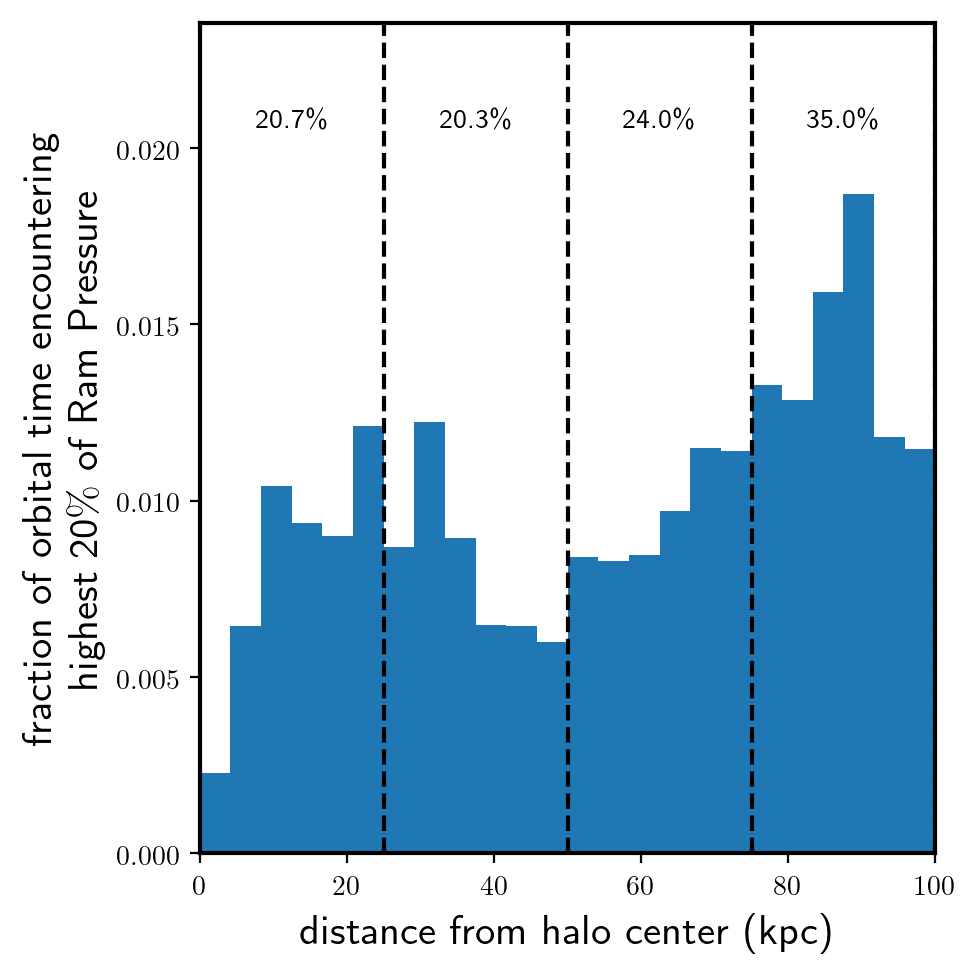

In [3]:
halonames = ['2392', '2878','4123','5016','5036','8508']

sat_orbits = np.load('satellite_orbits.npy', allow_pickle = True)[()]
quartiles = [(0, 25), (25, 50), (50, 75), (75, 100)]

for frac in np.arange(0.20, 0.25, 0.05):
    print(frac)
    dists_all_allhalos = []
    for haloname in halonames:
        plunges = np.load('/Users/rsimons/Dropbox/foggie/paper_stuff/response/real_orbits_plunge/plunges_in_%s.npy'%haloname, allow_pickle = True)[()]

        sample = [('2878', 'f'),
                  ('2878', 'h'),
                  ('2878', 'q'),
                  ('2878', 'l'),
                  ('2878', 'h'),
                  ('2878', 'q'),
                  ('2878', 'l'),
                  ('5036', 'c'),
                  ('5036', 'g'),
                  ('5036', 'd'), 
                  ('4123', 'b'),
                  ('4123', 'a')]


        fig1, ax1 = plt.subplots(1,1, figsize = (5, 5))


        dists_all = []

        for s, (halo, sat) in enumerate(sample):
            n_peri = len(sat_orbits[halo][sat]['peri_index'])
            peri_index = sat_orbits[halo][sat]['peri_index'][0]

            for i in plunges[halo][sat]:
                distance    = np.array(plunges[halo][sat][i]['r'])

                time = np.array(plunges[halo][sat][i]['t'])*1.4
                RP = (plunges[halo][sat][i]['RP'] * u.g*u.km**2/(u.cm**3*u.s**2)).to('dyne/cm^2')

                g_min = where(distance < 100.)[0][0]
                g_max = peri_index

                RP_p = RP[g_min:g_max]
                distance_p = distance[g_min:g_max]
                args = argsort(RP_p)[::-1]

                dists = distance_p[args][0:int(frac*len(RP_p))]

                for d in dists: dists_all.append(d)



        #ax1.axvline(x = 600, linestyle = 'dashed', color = 'black')
        #ax1.annotate("freefall", 600, 1.e3, rotation = 90, x = 600, linestyle = 'dashed', color = 'black')
        for dd in dists_all: dists_all_allhalos.append(dd)
        dists_all = np.array(dists_all)
        ax1.hist(dists_all, bins = np.linspace(0, 100, 10), normed=  True)
        #ax1.legend(loc = 2)        
        #m_peri_all = np.array(m_peri_all)
        #m_peri_all = m_peri_all[~np.isnan(m_peri_all)]
        #p16, p50, p84 = np.percentile(m_peri_all, [16, 50, 84])
        #print (np.log10(p16), np.log10(p50), np.log10(p84))
        #for ax in [ax1, ax2, ax3]:
        #ax1.set_yscale('log')
        #ax1.set_ylim(1.e3, 1.e9)
        #ax.set_ylabel('Cumulative Surface Momentum Imparted\n(M$_{\odot}$ km s$^{-1}$ kpc$^{-2}$)')
        #ax1.set_xlabel('Time Elapsed Since R = 100 kpc\n(Myr)')

        ax1.set_ylim(ax1.get_ylim()[0], ax1.get_ylim()[1] * 1.2 )



        for (mn, mx) in quartiles:
            ax1.axvline(x = mx, color = 'black', linestyle = '--', zorder = 10)
            num = len(np.where((dists_all < mx) & (dists_all > mn))[0])
            ax1.annotate('%.1f'%(100.*num/len(dists_all)) + '\%', ((mn+mx)/2./100., 0.9),\
                         ha = 'center', va = 'top', xycoords = 'axes fraction')



        ax1.set_title('fraction of time where highest %i'%(frac*100) + '$\%$ of Ram Pressure is encountered\n'+ '%s, z = 2'%haloname)
        ax1.set_xlabel('distance from halo center (kpc)')
        ax1.set_ylabel('normalized fraction')
        ax1.set_xlim(0, 100)
        fig1.tight_layout()
        fig1.set_dpi(200)



        fig1.savefig('/Users/rsimons/Dropbox/foggie/paper_stuff/response/real_orbits_plunge/figures/RP_10th_pericenter_%s_%.2f.png'%(haloname, frac))

    fig, ax = plt.subplots(1,1, figsize = (5, 5))
    dists_all_allhalos = np.array(dists_all_allhalos)
    ax.hist(dists_all_allhalos, bins = np.linspace(0, 100, 25), normed=  True)

    for (mn, mx) in quartiles:
        ax.axvline(x = mx, color = 'black', linestyle = '--', zorder = 10)
        num = len(np.where((dists_all_allhalos < mx) & (dists_all_allhalos > mn))[0])
        ax.annotate('%.1f'%(100.*num/len(dists_all_allhalos)) + '\%', ((mn+mx)/2./100., 0.9),\
                     ha = 'center', va = 'top', xycoords = 'axes fraction')


    ax.set_ylim(0, ax.get_ylim()[1]*1.2)

    #ax.set_title('fraction of time where highest %i'%(frac*100) + '$\%$ of Ram Pressure is encountered\n'+ 'z = 2')
    ax.set_xlabel('distance from halo center (kpc)')
    #ax.set_ylabel('normalized fraction')
    ax.set_ylabel('fraction of orbital time encountering\n highest %i'%(frac*100) + '$\%$ of ram pressure')
    ax.set_xlim(0, 100)
    fig.tight_layout()
    fig.set_dpi(200)


    fig.savefig('/Users/rsimons/Dropbox/foggie/paper_stuff/response/real_orbits_plunge/figures/RP_10th_pericenter_allhalos_%.2f.png'%frac)







/Users/rsimons/opt/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


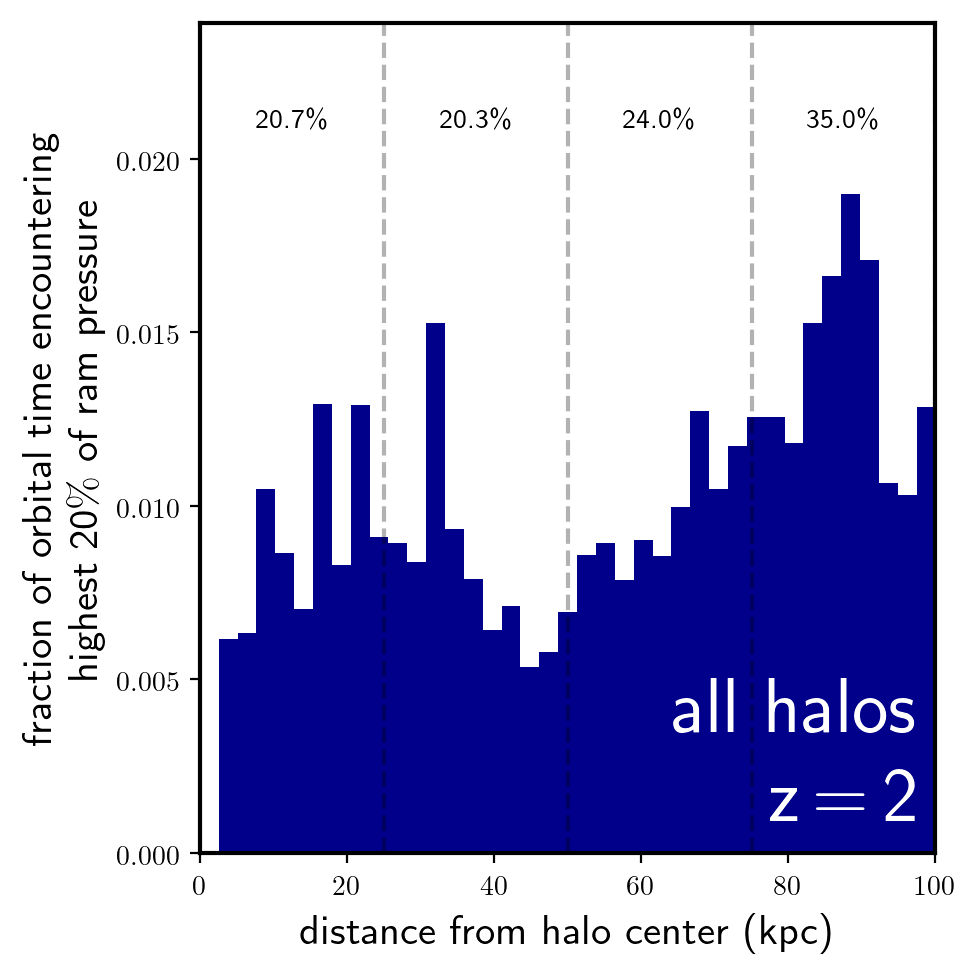

In [28]:
    fig, ax = plt.subplots(1,1, figsize = (5, 5))
    dists_all_allhalos = np.array(dists_all_allhalos)
    ax.hist(dists_all_allhalos, bins = np.linspace(0, 100, 40), normed=  True, alpha = 1.0, color = 'darkblue')

    for (mn, mx) in quartiles:
        ax.axvline(x = mx, color = 'black', linestyle = '--', zorder = 10, alpha = 0.3)
        num = len(np.where((dists_all_allhalos < mx) & (dists_all_allhalos > mn))[0])
        ax.annotate('%.1f'%(100.*num/len(dists_all_allhalos)) + '\%', ((mn+mx)/2./100., 0.9),\
                     ha = 'center', va = 'top', xycoords = 'axes fraction')

    ax.annotate('all halos\nz$\,$=$\,$2', (0.98, 0.02),\
                 ha = 'right', va = 'bottom', color = 'white', fontweight = 'bold', fontsize = 28, xycoords = 'axes fraction')


    ax.set_ylim(0, ax.get_ylim()[1]*1.2)

    #ax.set_title('fraction of time where highest %i'%(frac*100) + '$\%$ of Ram Pressure is encountered\n'+ 'z = 2')
    ax.set_xlabel('distance from halo center (kpc)')
    #ax.set_ylabel('normalized fraction')
    ax.set_ylabel('fraction of orbital time encountering\n highest %i'%(frac*100) + '$\%$ of ram pressure')
    ax.set_xlim(0, 100)
    fig.tight_layout()
    fig.set_dpi(200)


    fig.savefig('/Users/rsimons/Dropbox/foggie/paper_stuff/response/real_orbits_plunge/figures/RP_10th_pericenter_allhalos_%.2f.png'%frac)


